In [1]:
import cv2
from skimage import draw

http://nickc1.github.io/python,/matlab/2016/05/17/Standard-Deviation-(Filters)-in-Matlab-and-Python.html

In [2]:
from skimage import io
filename = 'analyses/MDA231_stopper_1_c3.tif'
plate = io.imread(filename,as_grey=True)
image = plate
io.imshow(image)

/opt/conda/envs/python3.6/lib/python3.6/site-packages/skimage/io/_io.py:49: UserWarning: `as_grey` has been deprecated in favor of `as_gray`
  warn('`as_grey` has been deprecated in favor of `as_gray`')


In [3]:
# import cv2
# import numpy as np

# img = cv2.imread('....') # Read in the image
# sobelx = cv2.Sobel(img,cv2.CV_64F,1,0) # Find x and y gradients
# sobely = cv2.Sobel(img,cv2.CV_64F,0,1)

# # Find magnitude and angle
# magnitude = np.sqrt(sobelx**2.0 + sobely**2.0)
# angle = np.arctan2(sobely, sobelx) * (180 / np.pi)

/opt/conda/envs/python3.6/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:80: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


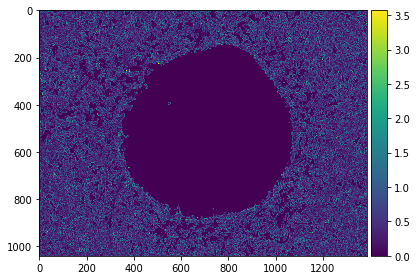

In [4]:
# https://stackoverflow.com/questions/47835138/imgradient-matlab-equivalent-in-python
import cv2
import numpy as np

# img = cv2.imread('....') # Read in the image
sobelx = cv2.Sobel(image,cv2.CV_64F,1,0) # Find x and y gradients
sobely = cv2.Sobel(image,cv2.CV_64F,0,1)

# Find magnitude and angle
I2 = np.sqrt(sobelx**2.0 + sobely**2.0)
# angle = np.arctan2(sobely, sobelx) * (180 / np.pi)
io.imshow(I2)

In [5]:
from scipy.ndimage.filters import uniform_filter
import numpy as np

def window_stdev(X, window_size):
    c1 = uniform_filter(X, window_size, mode='reflect')
    c2 = uniform_filter(X*X, window_size, mode='reflect')
    return np.sqrt(c2 - c1*c1)

# x = np.arange(16).reshape(4,4).astype('float')
kernel_size = 3
I1 = window_stdev(I2,kernel_size)*np.sqrt(kernel_size**2/(kernel_size**2 - 1))

/opt/conda/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


/home/jovyan/.local/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/home/jovyan/.local/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/home/jovyan/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


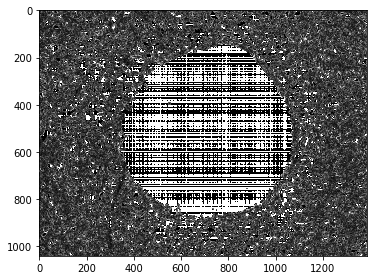

In [6]:
io.imshow(I1)

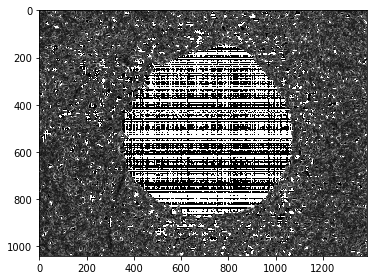

In [7]:
from scipy.signal import medfilt2d
I1 = medfilt2d(I1, kernel_size=3)
io.imshow(I1)

In [11]:
kernel = np.zeros((80,80),np.uint8)
coords = draw.circle(40, 40, 40, shape=image.shape)
kernel[coords] = 1 
erosion = cv2.erode(I1,kernel,iterations = 1)
# io.imshow(erosion)
# # kernel = np.ones((40,40),np.uint8)
# # erosion = cv2.erode(I1,kernel,iterations = 1)
# # io.imshow(erosion)

In [9]:
# from skimage.morphology import reconstruction
# fill = reconstruction(I1, erosion, method='erosion')
# io.imshow(fill)

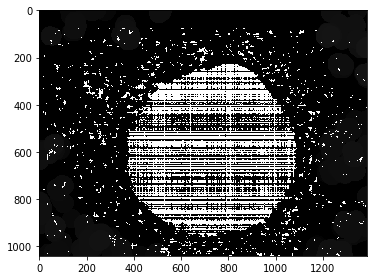

In [12]:
dilation = cv2.dilate(erosion,kernel,iterations = 1)
io.imshow(dilation)

In [ ]:
# fill = reconstruction(I1, dilation, method='dilation')
# io.imshow(fill)

/opt/conda/envs/python3.6/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:122: RuntimeWarning: invalid value encountered in greater
  if method == 'dilation' and np.any(seed > mask):


In [11]:
# seed = np.copy(I1)

In [12]:
# seed[1:-1, 1:-1] = I1.max()

In [13]:
# mask = I1

In [14]:
# filled = reconstruction(seed, mask, method='erosion')

In [15]:
# seed = np.copy(I1)
# seed[1:-1, 1:-1] = I1.max()
# mask = I1

# filled = reconstruction(seed, mask, method='erosion')
# io.imshow(filled)

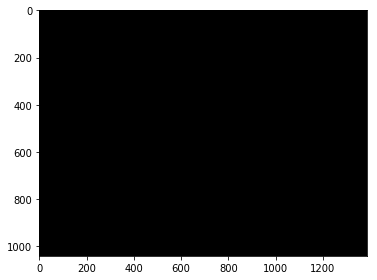

In [13]:
mask = cv2.bitwise_not(dilation)
io.imshow(mask)